## Economic Data Analysis with Federal Reserve Economic Data (FRED) API

### Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

### Set Configurations

In [2]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

### Set API KEY

In [3]:
fred_key = 'ec1e6718b0c7f2371fd0c317a6d6b7bc'

In [4]:
fred = Fred(api_key=fred_key)


### Search S&P500 index on API

In [5]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-08-28,2023-08-28,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-08-25,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-28 13:29:11-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-08-28,2023-08-28,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-08-28,2023-08-28,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-08-25,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-28 13:29:15-05:00,82,This data represents the effective yield of th...
SP500,SP500,2023-08-28,2023-08-28,S&P 500,2013-08-26,2023-08-25,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-25 19:11:01-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-08-28,2023-08-28,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...


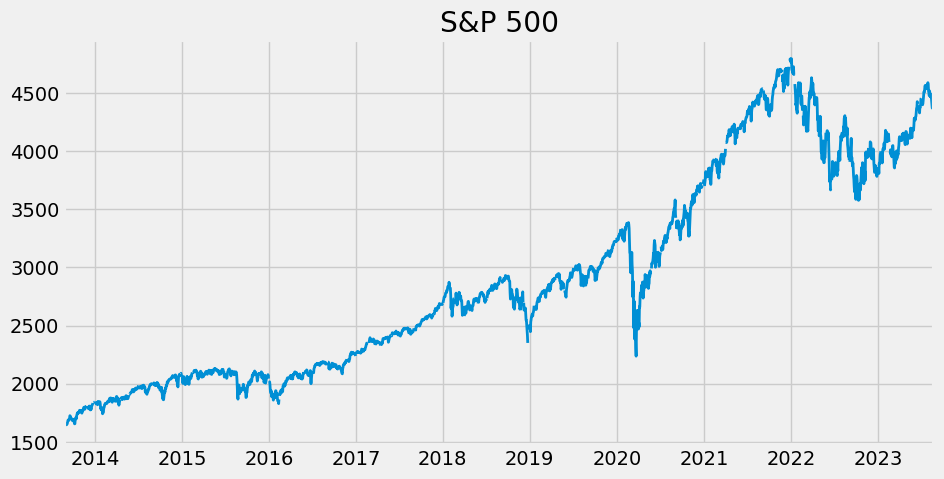

In [6]:
#plot s&p500 data
sp500 = fred.get_series('SP500')
sp500.plot(figsize=(10,5), title='S&P 500', lw=2);

### Unemployment Rate Dataframes

In [7]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df.loc[unemp_df['id'].str.contains(r'.UR$', na=False)]

In [8]:
unemp_df.shape

(57, 15)

In [9]:
all_results = []
for ids in unemp_df.index:
    results = fred.get_series(ids)
    results = results.to_frame(name=ids)
    all_results.append(results)

In [10]:
uemp_states = pd.concat(all_results, axis=1)
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
uemp_states.columns = [id_to_state[col] for col in uemp_states.columns]

#### Dataframe

In [11]:
uemp_states

,California,Florida,Texas,New York,North Carolina,Ohio,Alabama,New Jersey,Michigan,Massachusetts,Illinois,Pennsylvania,Georgia,Tennessee,Colorado,South Carolina,Minnesota,Maryland,Virginia,Iowa,Arizona,West Virginia,Wisconsin,Arkansas,Washington,Indiana,Kentucky,Missouri,New Mexico,Oklahoma,the District of Columbia,Montana,Alaska,Nevada,Oregon,Utah,Louisiana,Kansas,Connecticut,Hawaii,North Dakota,Rhode Island,Mississippi,Puerto Rico,Nebraska,New Hampshire,Maine,Midwest Census Region,Delaware,South Dakota,Wyoming,Idaho,Vermont,Northeast Census Region,New England Census Division,South Census Region,West Census Region
1976-01-01,9.2,9.7,5.8,10.3,6.4,8.1,6.6,10.3,9.9,10.5,6.6,8.0,8.4,6.0,5.8,7.4,6.0,6.4,6.1,4.3,10.2,7.5,5.8,7.3,8.5,6.6,5.6,5.9,8.6,5.8,8.7,5.8,7.1,9.2,9.5,5.8,6.3,4.2,9.8,9.8,3.4,7.8,6.7,19.6,3.3,6.5,8.7,6.8,8.0,3.3,4.1,5.6,8.6,9.6,9.6,6.9,8.6
1976-02-01,9.2,9.7,5.8,10.3,6.4,8.1,6.6,10.3,9.9,10.5,6.6,8.1,8.4,6.0,5.7,7.4,6.0,6.4,6.1,4.3,10.2,7.5,5.8,7.3,8.5,6.6,5.6,5.9,8.7,5.8,8.7,5.8,7.1,9.2,9.5,5.9,6.3,4.2,9.8,9.8,3.4,7.8,6.7,19.5,3.3,6.5,8.7,6.8,8.0,3.3,4.1,5.6,8.6,9.6,9.6,6.9,8.6
1976-03-01,9.1,9.6,5.9,10.2,6.4,8.1,6.6,10.3,9.9,10.5,6.6,8.1,8.4,6.0,5.7,7.3,5.9,6.4,6.1,4.3,10.1,7.5,5.7,7.3,8.4,6.5,5.6,5.9,8.7,5.8,8.6,5.8,7.0,9.2,9.4,5.8,6.3,4.2,9.8,9.8,3.4,7.7,6.6,19.3,3.3,6.5,8.6,6.8,8.0,3.2,4.1,5.6,8.6,9.6,9.6,6.9,8.6
1976-04-01,9.1,9.5,5.9,10.2,6.3,8.0,6.5,10.3,9.8,10.3,6.6,8.1,8.3,6.0,5.6,7.2,5.8,6.4,6.0,4.2,10.0,7.5,5.6,7.2,8.5,6.3,5.6,6.0,8.6,5.8,8.5,5.8,6.9,9.0,9.2,5.8,6.4,4.2,9.6,9.7,3.5,7.7,6.4,19.0,3.2,6.5,8.6,6.7,8.1,3.1,4.0,5.6,8.6,9.5,9.4,6.8,8.5
1976-05-01,9.0,9.3,5.9,10.1,6.1,7.8,6.4,10.3,9.6,10.1,6.6,8.1,8.1,5.9,5.6,7.0,5.7,6.5,5.9,4.1,9.8,7.4,5.5,7.1,8.5,6.0,5.5,6.0,8.6,5.7,8.4,5.8,6.9,8.9,9.1,5.7,6.5,4.2,9.4,9.4,3.6,7.7,6.3,18.9,3.1,6.5,8.5,6.6,8.3,3.1,3.9,5.6,8.5,9.5,9.3,6.7,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.4,2.6,4.0,4.1,3.5,3.8,2.3,3.5,4.1,3.5,4.4,4.2,3.1,3.4,2.8,3.2,2.8,2.7,3.2,2.8,3.5,3.4,2.5,3.0,4.5,3.1,3.8,2.5,3.5,3.0,4.8,2.3,3.7,5.5,4.4,2.4,3.6,2.9,3.9,3.5,2.1,3.1,3.5,6.0,2.1,2.4,2.6,3.4,4.4,1.9,3.7,2.6,2.7,3.8,3.4,3.3,4.0
2023-04-01,4.5,2.6,4.0,4.0,3.4,3.7,2.2,3.5,3.8,3.1,4.2,4.1,3.1,3.3,2.8,3.1,2.8,2.5,3.1,2.7,3.4,3.3,2.4,2.8,4.3,3.0,3.7,2.5,3.5,2.9,5.0,2.3,3.7,5.4,4.0,2.3,3.6,2.9,3.8,3.3,2.1,3.0,3.4,6.0,2.0,2.1,2.4,3.3,4.3,1.9,3.5,2.6,2.4,3.7,3.2,3.3,4.0
2023-05-01,4.5,2.6,4.1,3.9,3.4,3.6,2.2,3.6,3.7,2.8,4.1,4.0,3.2,3.3,2.8,3.1,2.9,2.4,2.9,2.7,3.4,3.3,2.4,2.7,4.1,3.1,3.8,2.5,3.5,2.8,5.1,2.3,3.6,5.4,3.7,2.3,3.6,2.9,3.7,3.1,2.1,3.0,3.2,6.1,1.9,1.9,2.4,3.2,4.2,1.9,3.3,2.6,2.1,3.6,3.0,3.3,4.0
2023-06-01,4.6,2.6,4.1,3.9,3.3,3.4,2.2,3.7,3.6,2.6,4.0,3.8,3.2,3.2,2.8,3.1,2.9,2.0,2.7,2.7,3.5,3.3,2.5,2.6,3.8,3.2,3.8,2.6,3.5,2.7,5.1,2.4,3.7,5.4,3.5,2.4,3.6,2.8,3.7,3.0,2.0,2.9,3.1,6.1,1.9,1.8,2.4,3.2,4.2,1.8,3.1,2.7,1.9,3.5,2.8,3.2,4.0


In [12]:
#Remove ';' to see DF
uemp_states = uemp_states.iloc[ : , :-4];
uemp_states = uemp_states.drop(columns='Puerto Rico')
uemp_states = uemp_states.drop(columns='Midwest Census Region')

### Plot States Unemployment Rate

In [13]:
px.line(uemp_states)

### Get April 2020 Unemployment Rate Per State

In [24]:
uemp_states.loc[uemp_states.index == '2020-04-01'].T

,2020-04-01
California,16.1
Florida,13.3
Texas,12.8
New York,15.6
North Carolina,14.2
Ohio,16.4
Alabama,13.8
New Jersey,14.9
Michigan,22.6
Massachusetts,16.9


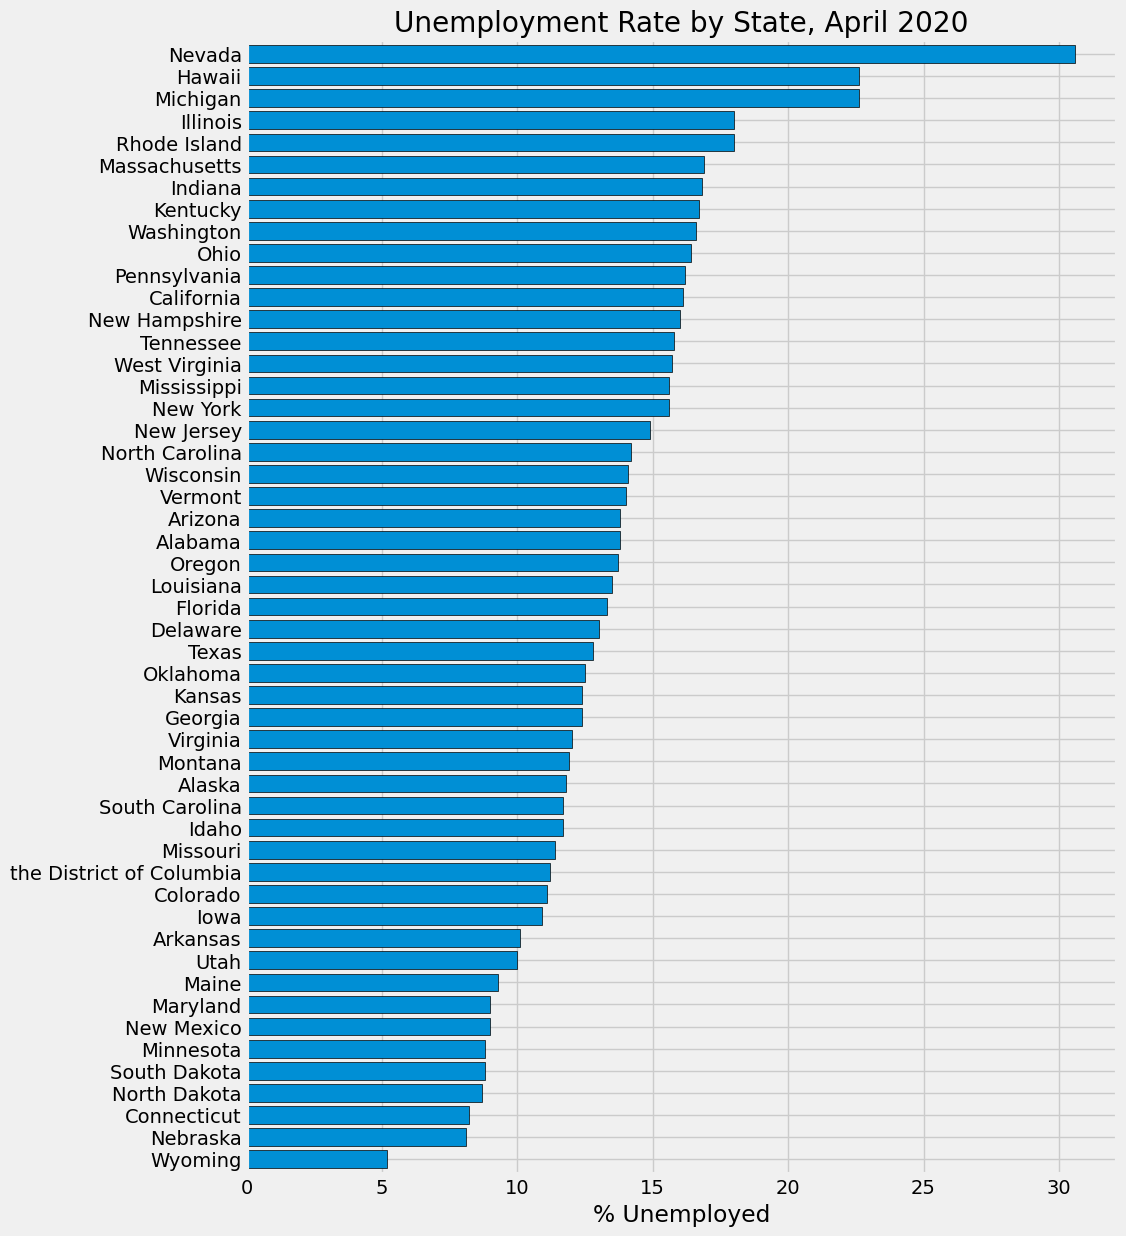

In [14]:
ax = uemp_states.loc[uemp_states.index == '2020-04-01'].T \
    .sort_values('2020-04-01')\
    .plot(kind='barh', figsize=(10,14), width=0.8, edgecolor='black',
          title='Unemployment Rate by State, April 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()


### Get Participation Rate

In [15]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units ==  "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]

In [16]:
part_df.shape

(51, 15)

In [17]:
id_to_participation = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

all_results = []
for ids in part_df.index:
    results = fred.get_series(ids)
    results = results.to_frame(name=ids)
    all_results.append(results)

#all_results


In [18]:
part_states = pd.concat(all_results, axis=1)
part_states.columns = [id_to_participation[col] for col in part_states.columns]

In [19]:
part_states

,Alabama,California,Kentucky,Florida,Wisconsin,Minnesota,Pennsylvania,Michigan,New York,Iowa,Mississippi,Virginia,Tennessee,Ohio,New Mexico,Texas,Maryland,West Virginia,Maine,North Carolina,Georgia,Arizona,Utah,Illinois,Massachusetts,Colorado,New Hampshire,Alaska,Louisiana,Indiana,Oklahoma,Oregon,Arkansas,Missouri,Washington,Nebraska,New Jersey,South Carolina,Connecticut,Idaho,Montana,South Dakota,Kansas,Nevada,Vermont,North Dakota,Delaware,Rhode Island,Wyoming,Hawaii,District Of Columbia
1976-01-01,57.0,62.6,60.5,55.8,65.6,65.6,58.4,61.6,58.0,64.4,58.8,65.9,59.6,61.7,60.8,63.8,64.3,52.5,62.1,66.5,63.7,59.5,62.8,63.0,64.8,67.2,65.9,69.0,56.8,64.0,59.3,62.9,57.9,60.5,60.9,64.9,61.5,65.3,64.2,63.0,62.7,64.6,65.1,71.3,63.6,62.6,62.7,63.8,65.3,69.9,64.4
1976-02-01,56.9,62.4,60.3,55.7,65.5,65.5,58.3,61.5,58.0,64.3,58.6,65.8,59.4,61.7,60.5,63.5,64.2,52.4,61.9,66.3,63.6,59.2,62.6,63.0,64.7,67.0,65.6,68.4,56.6,63.9,59.2,62.7,57.8,60.3,60.7,64.9,61.4,65.2,64.1,62.8,62.5,64.4,65.0,70.8,63.4,62.4,62.5,63.7,64.9,69.6,64.5
1976-03-01,56.8,62.2,60.2,55.5,65.4,65.4,58.3,61.5,58.0,64.2,58.5,65.6,59.3,61.7,60.3,63.4,64.1,52.3,61.9,66.2,63.5,59.1,62.5,62.9,64.6,66.8,65.6,67.8,56.5,63.8,59.1,62.5,57.7,60.3,60.6,64.8,61.4,65.0,64.0,62.7,62.4,64.4,64.9,70.5,63.2,62.3,62.5,63.6,64.7,69.6,64.5
1976-04-01,56.8,62.2,60.1,55.5,65.4,65.4,58.3,61.6,58.0,64.1,58.5,65.5,59.3,61.6,60.3,63.5,64.1,52.3,61.8,66.2,63.5,59.1,62.5,62.9,64.6,66.6,65.7,67.9,56.4,63.8,59.0,62.4,57.7,60.4,60.6,64.8,61.5,64.9,64.1,62.7,62.3,64.3,65.0,70.4,63.5,62.5,62.4,63.7,64.9,69.4,64.5
1976-05-01,56.8,62.3,60.1,55.4,65.5,65.5,58.3,61.7,58.1,64.1,58.5,65.4,59.4,61.6,60.3,63.6,64.1,52.2,61.7,66.3,63.6,59.1,62.6,63.0,64.6,66.5,66.0,67.9,56.4,63.9,59.0,62.5,57.7,60.6,60.7,64.8,61.6,64.7,64.3,62.8,62.2,64.3,65.1,70.5,63.6,62.6,62.4,63.6,65.2,69.3,64.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,56.7,62.3,57.5,59.3,64.6,68.0,62.0,59.9,60.7,68.2,54.4,65.9,59.0,61.5,56.7,63.9,64.9,54.6,58.0,60.4,61.1,61.6,68.9,64.7,65.0,68.5,65.8,65.3,59.3,63.5,61.0,62.7,57.4,62.9,64.6,69.5,64.8,56.1,64.5,62.6,62.6,67.5,66.6,61.4,63.7,69.3,59.7,62.9,64.3,60.4,70.6
2023-04-01,56.8,62.4,57.6,59.3,64.8,68.1,62.0,60.2,60.8,68.3,54.5,66.2,59.1,61.8,56.8,64.1,65.1,54.6,58.1,60.5,61.2,61.6,69.1,64.8,64.8,68.6,65.6,65.3,59.5,63.6,61.1,62.4,57.5,63.2,64.7,69.5,65.0,56.3,64.3,62.5,62.7,67.7,66.7,61.4,63.7,69.6,59.8,62.9,64.5,60.4,70.6
2023-05-01,56.9,62.5,57.7,59.4,65.1,68.2,62.0,60.5,61.0,68.5,54.6,66.5,59.2,62.1,56.9,64.2,65.3,54.6,58.3,60.6,61.3,61.7,69.4,64.7,64.7,68.7,65.3,65.3,59.6,63.6,61.3,62.2,57.5,63.4,64.8,69.5,65.2,56.5,64.2,62.5,62.8,67.8,66.8,61.5,63.7,69.7,59.9,63.1,64.6,60.4,70.8
2023-06-01,57.0,62.5,57.8,59.5,65.3,68.4,62.0,60.7,61.2,68.7,54.5,66.6,59.3,62.2,57.0,64.2,65.3,54.6,58.4,60.7,61.3,61.7,69.6,64.6,64.6,68.7,65.2,65.3,59.5,63.6,61.4,62.0,57.6,63.6,64.7,69.5,65.4,56.7,64.1,62.5,62.8,67.9,66.8,61.5,63.8,69.7,60.0,63.2,64.6,60.4,70.8


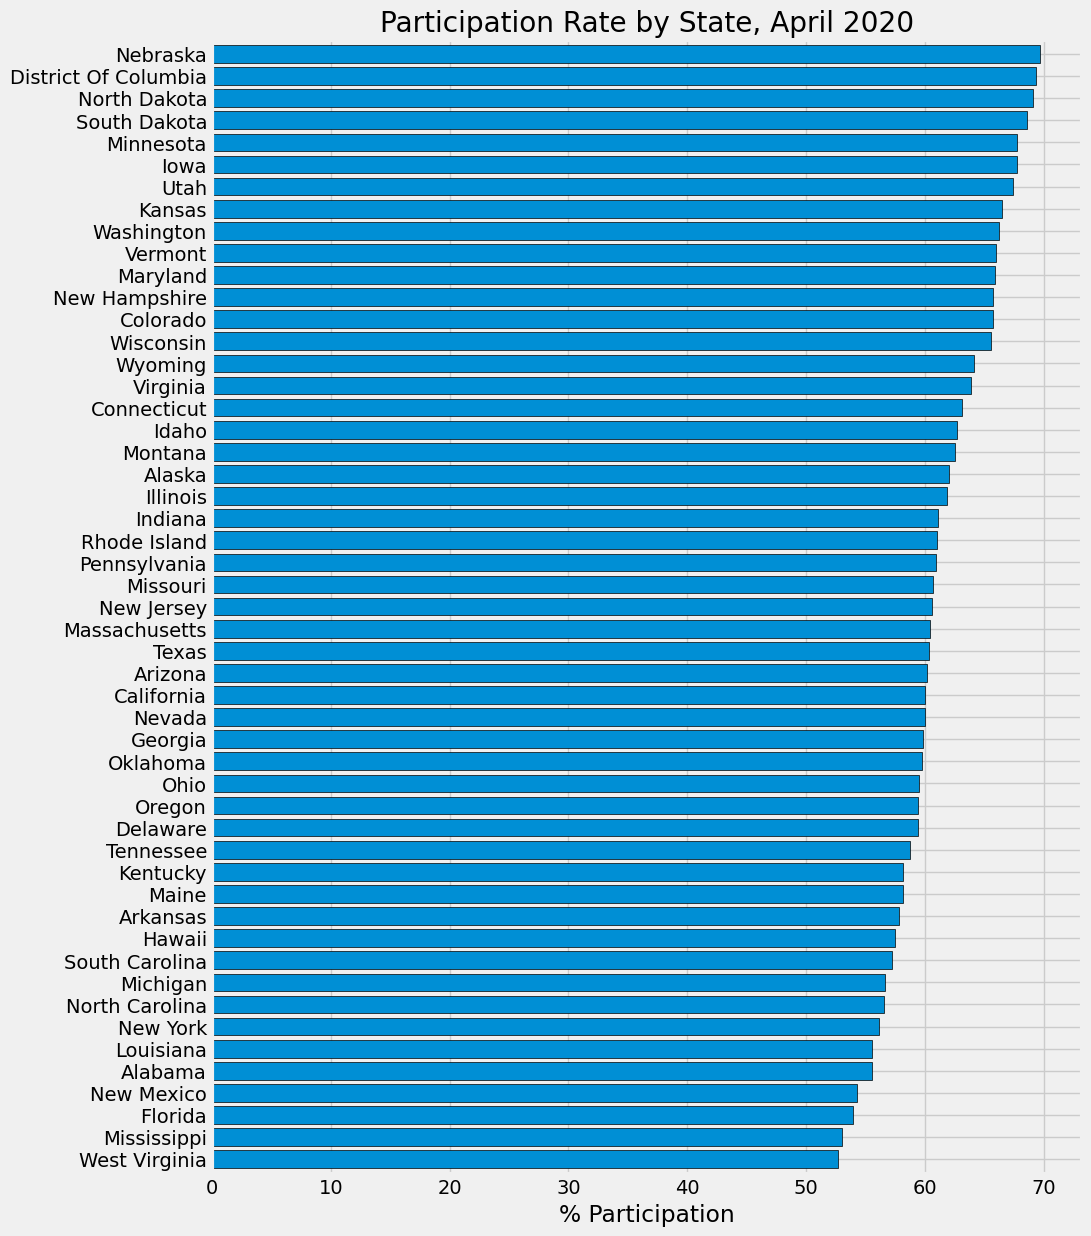

In [27]:
ax = part_states.loc[part_states.index == '2020-04-01'].T \
    .sort_values('2020-04-01')\
    .plot(kind='barh', figsize=(10,14), width=0.8, edgecolor='black',
          title='Participation Rate by State, April 2020')
ax.legend().remove()
ax.set_xlabel('% Participation')
plt.show()


### Plot Unemployment vs Participation

In [20]:
# Fix Distric of columbia name column
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

In [21]:
uemp_states.columns

Index(['California', 'Florida', 'Texas', 'New York', 'North Carolina', 'Ohio',
       'Alabama', 'New Jersey', 'Michigan', 'Massachusetts', 'Illinois',
       'Pennsylvania', 'Georgia', 'Tennessee', 'Colorado', 'South Carolina',
       'Minnesota', 'Maryland', 'Virginia', 'Iowa', 'Arizona', 'West Virginia',
       'Wisconsin', 'Arkansas', 'Washington', 'Indiana', 'Kentucky',
       'Missouri', 'New Mexico', 'Oklahoma', 'District Of Columbia', 'Montana',
       'Alaska', 'Nevada', 'Oregon', 'Utah', 'Louisiana', 'Kansas',
       'Connecticut', 'Hawaii', 'North Dakota', 'Rhode Island', 'Mississippi',
       'Nebraska', 'New Hampshire', 'Maine', 'Delaware', 'South Dakota',
       'Wyoming', 'Idaho', 'Vermont'],
      dtype='object')

In [22]:
part_states.columns

Index(['Alabama', 'California', 'Kentucky', 'Florida', 'Wisconsin',
       'Minnesota', 'Pennsylvania', 'Michigan', 'New York', 'Iowa',
       'Mississippi', 'Virginia', 'Tennessee', 'Ohio', 'New Mexico', 'Texas',
       'Maryland', 'West Virginia', 'Maine', 'North Carolina', 'Georgia',
       'Arizona', 'Utah', 'Illinois', 'Massachusetts', 'Colorado',
       'New Hampshire', 'Alaska', 'Louisiana', 'Indiana', 'Oklahoma', 'Oregon',
       'Arkansas', 'Missouri', 'Washington', 'Nebraska', 'New Jersey',
       'South Carolina', 'Connecticut', 'Idaho', 'Montana', 'South Dakota',
       'Kansas', 'Nevada', 'Vermont', 'North Dakota', 'Delaware',
       'Rhode Island', 'Wyoming', 'Hawaii', 'District Of Columbia'],
      dtype='object')

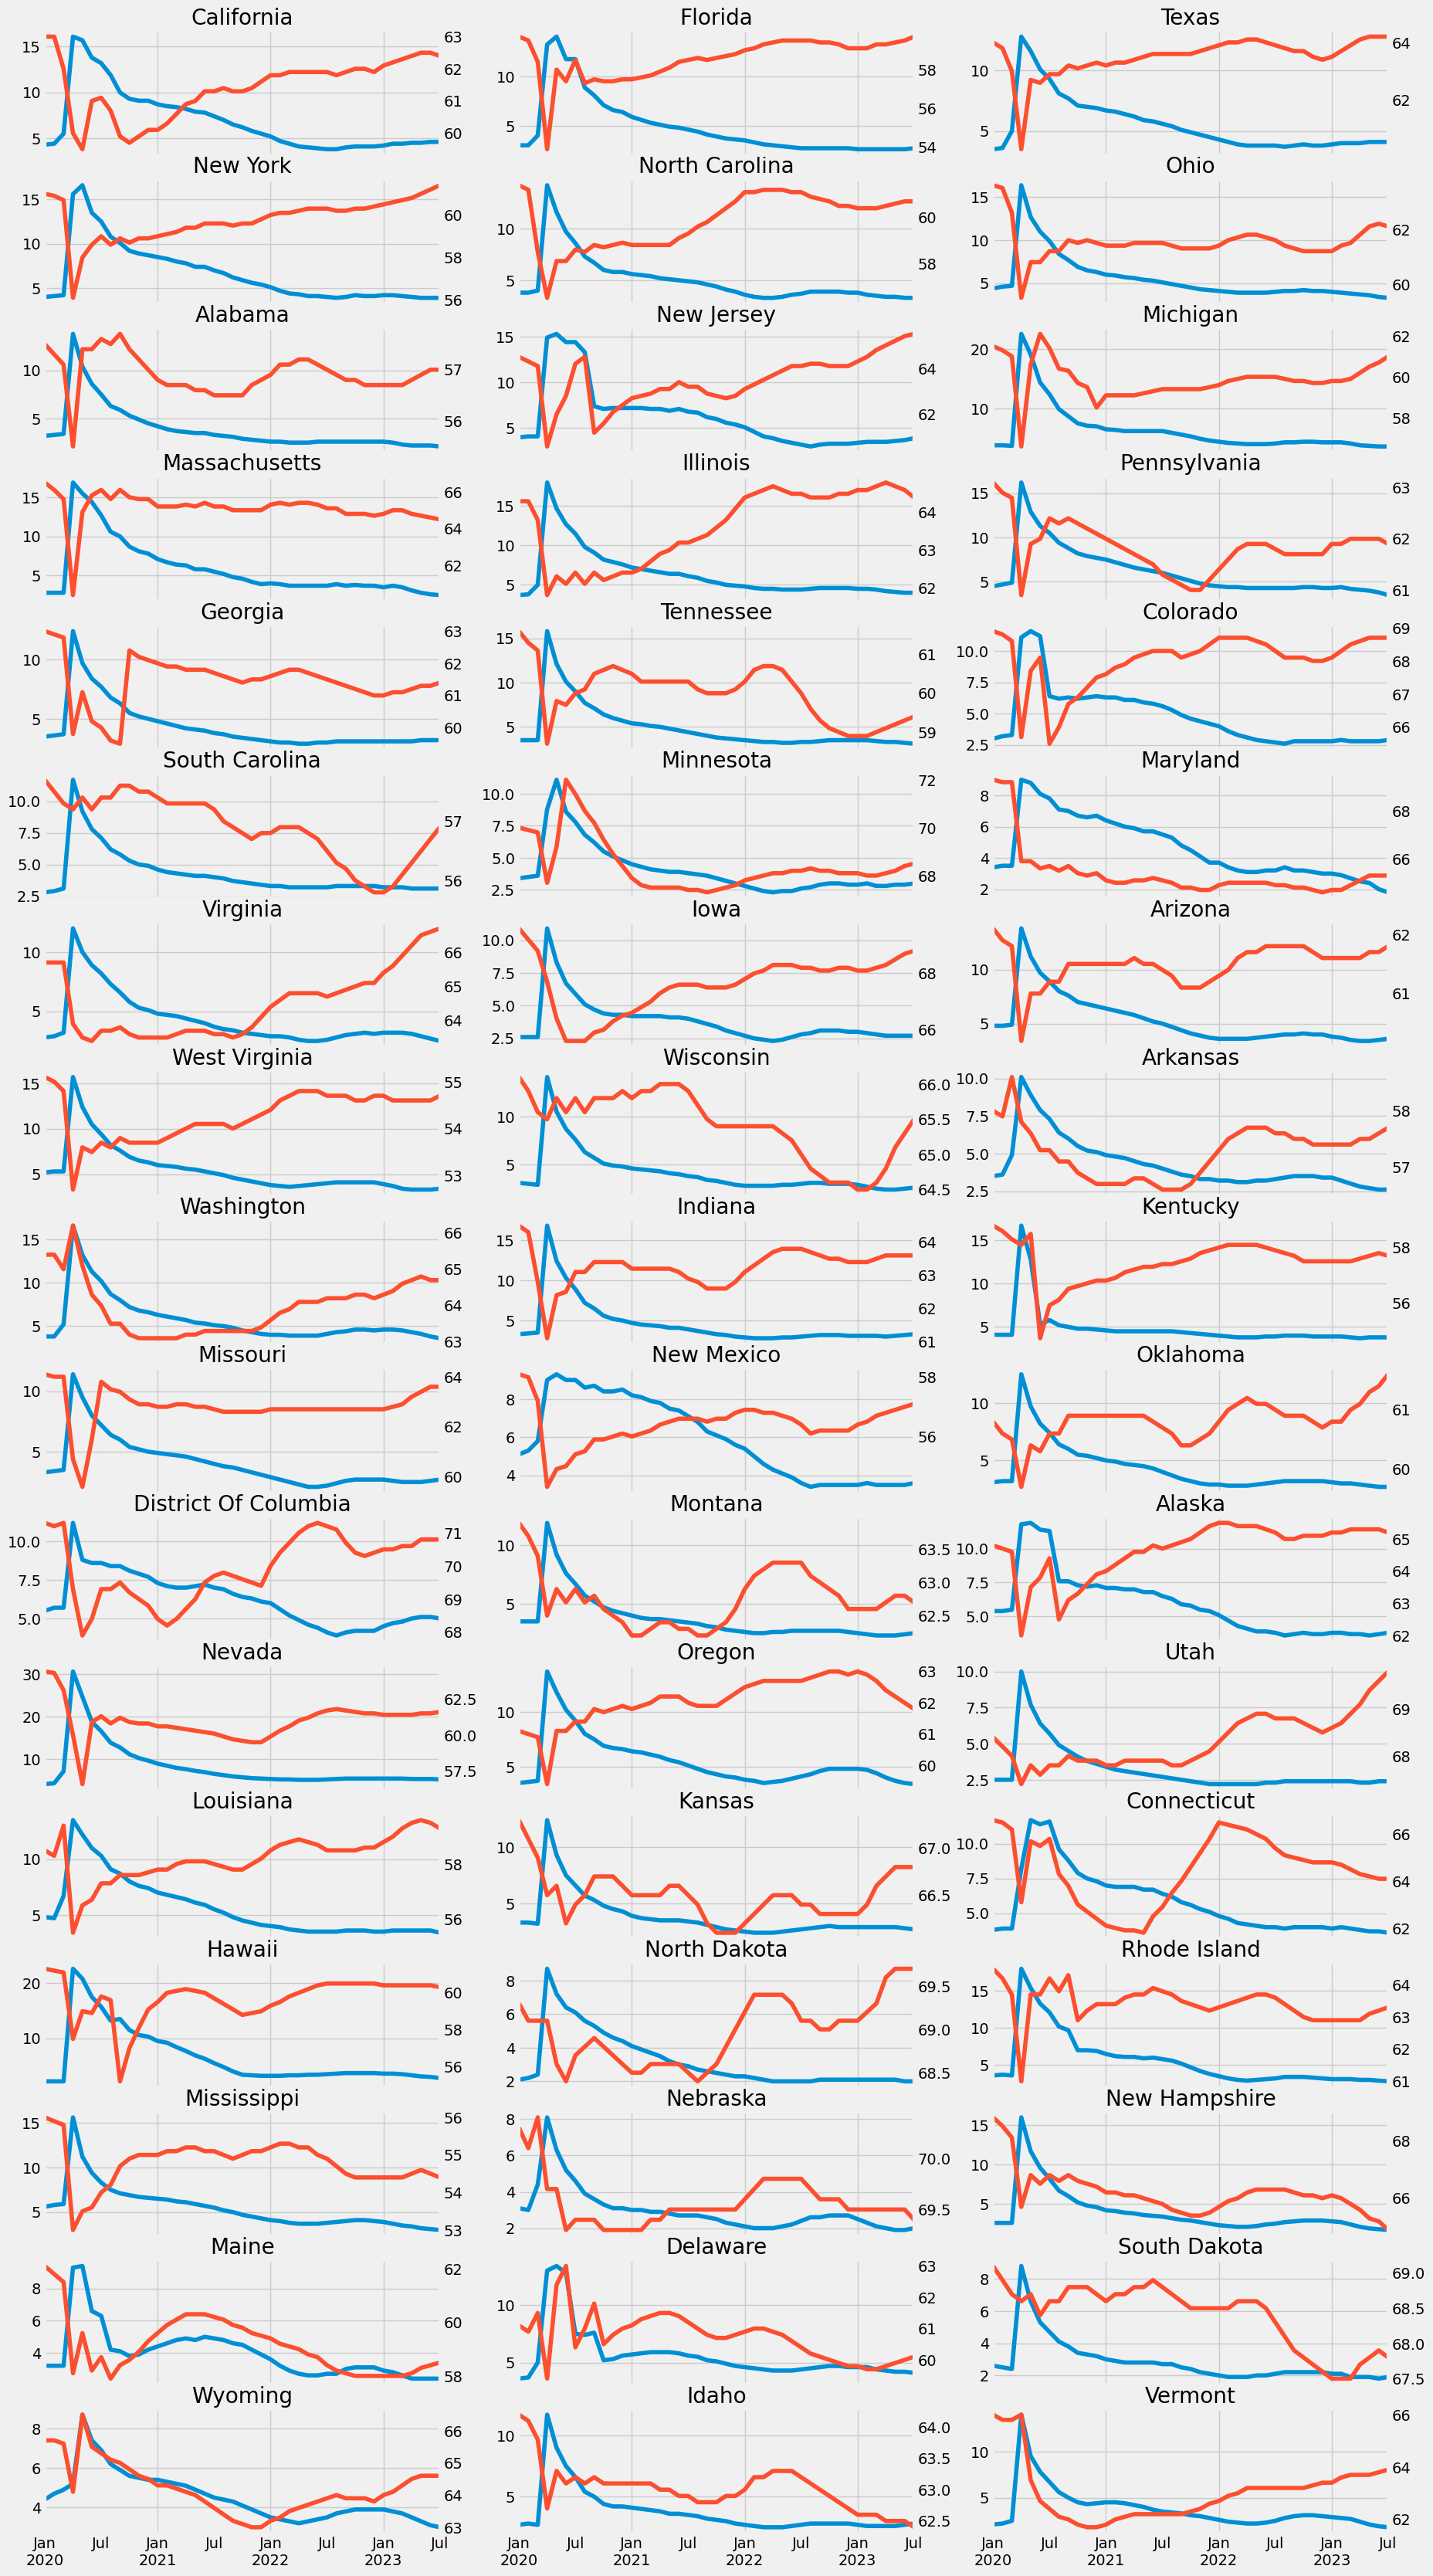

In [23]:
fig, axs = plt.subplots(17, 3, figsize=(20, 40), sharex=True)
axs = axs.flatten()

i=0

for state in uemp_states.columns:
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.show()

### Export data to CSV file

In [ ]:
uemp_states.query('index >= 2020').to_csv('Unemployment_states.csv')

In [ ]:
part_states.query('index >= 2020').to_csv('Participation_states.csv')